In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "Virny":
    os.chdir("../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/Virny


# Multiple Models Interface Usage

In [4]:
import os

from virny.utils.custom_initializers import read_model_metric_dfs, create_config_obj
from virny.custom_classes.metrics_interactive_visualizer import MetricsInteractiveVisualizer
from virny.custom_classes.metrics_composer import MetricsComposer

In [5]:
ROOT_DIR = os.path.join('docs', 'examples')
config_yaml_path = os.path.join(ROOT_DIR, 'experiment_config.yaml')
config_yaml_content = """
dataset_name: COMPAS_Without_Sensitive_Attributes
bootstrap_fraction: 0.8
n_estimators: 50  # Better to input the higher number of estimators than 100; this is only for this use case example
sensitive_attributes_dct: {'sex': 1, 'race': 'African-American', 'sex&race': None}
"""
with open(config_yaml_path, 'w', encoding='utf-8') as f:
    f.write(config_yaml_content)

config = create_config_obj(config_yaml_path=config_yaml_path)
model_names = ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier', 'XGBClassifier']
SAVE_RESULTS_DIR_PATH = os.path.join(ROOT_DIR, 'results', 'COMPAS_Without_Sensitive_Attributes_Metrics_20230812__224136')

In [6]:
models_metrics_dct = read_model_metric_dfs(SAVE_RESULTS_DIR_PATH, model_names=model_names)

In [7]:
metrics_composer = MetricsComposer(models_metrics_dct, config.sensitive_attributes_dct)

Compute composed metrics

In [8]:
models_composed_metrics_df = metrics_composer.compose_metrics()

In [1]:
import altair as alt
import gradio as gr
import numpy as np
import pandas as pd
from vega_datasets import data


def make_plot(plot_type):
    if plot_type == "scatter_plot":
        cars = data.cars()
        return alt.Chart(cars).mark_point().encode(
            x='Horsepower',
            y='Miles_per_Gallon',
            color='Origin',
        )
    elif plot_type == "heatmap":
        # Compute x^2 + y^2 across a 2D grid
        x, y = np.meshgrid(range(-5, 5), range(-5, 5))
        z = x ** 2 + y ** 2

        # Convert this grid to columnar data expected by Altair
        source = pd.DataFrame({'x': x.ravel(),
                               'y': y.ravel(),
                               'z': z.ravel()})
        return alt.Chart(source).mark_rect().encode(
            x='x:O',
            y='y:O',
            color='z:Q'
        )


with gr.Blocks() as demo:
    button = gr.Radio(label="Plot type",
                      choices=['scatter_plot', 'heatmap'], value='scatter_plot')
    plot = gr.Plot(label="Plot")
    button.change(make_plot, inputs=button, outputs=[plot])
    demo.load(make_plot, inputs=[button], outputs=[plot])


demo.launch(inline=False)

/Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/Virny/virny_env/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [2]:
demo.close()

Closing server running on port: 7860


## Metrics Visualization and Reporting

In [115]:
visualizer = MetricsInteractiveVisualizer(models_metrics_dct, models_composed_metrics_df, config.dataset_name,
                                          model_names=model_names,
                                          sensitive_attributes_dct=config.sensitive_attributes_dct)

In [ ]:
visualizer.start_web_app()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [17]:
visualizer.stop_web_app()

Closing server running on port: 7860


<AxesSubplot: title={'center': 'Model Ranks Based On Group Fairness and Stability Metrics'}>

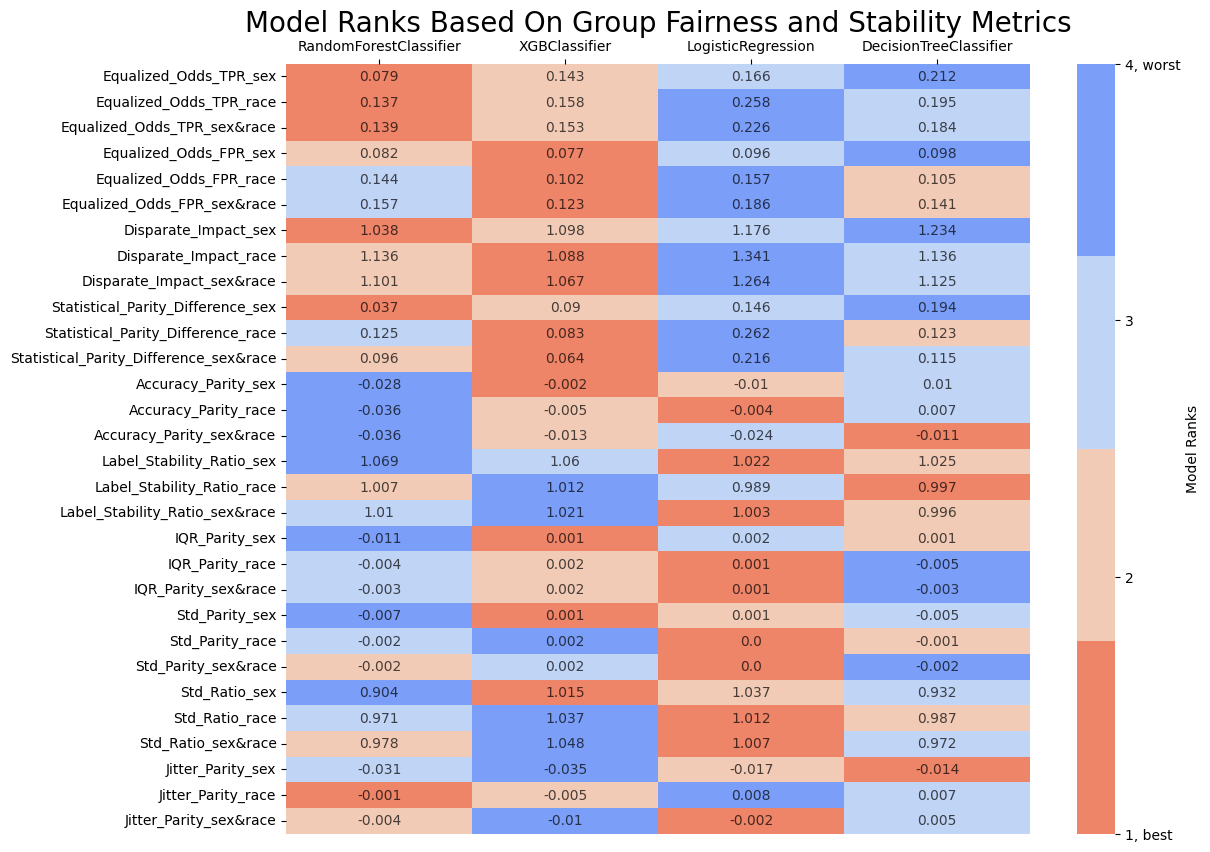

In [11]:
visualizer.create_model_rank_heatmap(
    metrics_lst=[
        # Group fairness metrics
        'Equalized_Odds_TPR',
        'Equalized_Odds_FPR',
        'Disparate_Impact',
        'Statistical_Parity_Difference',
        'Accuracy_Parity',
        # Group stability metrics
        'Label_Stability_Ratio',
        'IQR_Parity',
        'Std_Parity',
        'Std_Ratio',
        'Jitter_Parity',
    ],
    groups_lst=config.sensitive_attributes_dct.keys(),
)

In [74]:
visualizer.create_overall_metrics_bar_char(
    metrics_names=['TPR', 'PPV', 'Accuracy', 'F1', 'Selection-Rate', 'Positive-Rate'],
    metrics_title="Error Metrics"
)

alt.Chart(...)

In [75]:
visualizer.create_overall_metrics_bar_char(
    metrics_names=['Label_Stability'],
    reversed_metrics_names=['Std', 'IQR', 'Jitter'],
    metrics_title="Variance Metrics"
)

alt.Chart(...)